##CREANDO NOMBRES (JSON)


LEYENDO NOMBRES CON JSON

Al trabajar con datos estos datos pueden venir de diferente formato(txt, excel, api, etc). Vamos a crear una escuela con muchos alumnos y muchos datos, los archivos de los alumnos los vamos a extraer de la web(JSON)

In [ ]:

# 1°) Importamos datos desde una pagina web, la mejor manera de hacerlo es a traves de de las API que es un
# mecanismo que comunica un sistema con otro sistema y utiliza generalmente el formato JSON para exportar los datos,
# entonces vamos a buscar APIS que exporten nombres de personas, generalmente son las paginas web de censos de cualquier
# pais que proporciona estos datos de nombre de personas.

# EN GOOGLE -->  API CENSO NOMBRES NOMBRES BR (https://servicodados.ibge.gov.br/api/docs/nomes?versao=2) -->
# en Ranking por frequência --> copiamos el link (https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking)-->
# Luego ese link copiado lo pegamos en la barra de arriba del buscador y nos mostrara el registro de nombres--->
# [{"nome":"MARIA","frequencia":11734129,"ranking":1},{"nome":"JOSE","frequencia":5754529,"ranking":2},......}]
# Luego podemos seleccionar el nombre por sexo femenino por ejemplo agregandoles al https ese pedazo de link al final del
# link en la parte de parametros que nos da la pagina (https://servicodados.ibge.gov.br/api/v2/censos/nomes/ranking?sexo=F)-->
# [{"nome":"MARIA","frequencia":11694738,"ranking":1},{"nome":"ANA","frequencia":3079729,"ranking":2},.....}]

#Empezamos con el ejercicio luedo de la explicacion --->
#Importamos biblioteca pandas-->



################### UTILICE OTRO JSON URL DE LA WEB, NO FUNCIONO EL DEL AULA LATAM ########################

import pandas as pd

# los archivos pueden estar en un link de internet

nombres = pd.read_json("http://pythonhow.com/supermarkets.json")
nombres



,Address,City,Country,Employees,ID,Name,State
0,3666 21st St,San Francisco,USA,8,1,Madeira,CA 94114
1,735 Dolores St,San Francisco,USA,15,2,Bready Shop,CA 94119
2,332 Hill St,San Francisco,USA,25,3,Super River,California 94114
3,3995 23rd St,San Francisco,USA,10,4,Ben's Shop,CA 94114
4,1056 Sanchez St,San Francisco,USA,12,5,Sanchez,California
5,551 Alvarado St,San Francisco,USA,20,6,Richvalley,CA 94114


In [ ]:
type(nombres)

pandas.core.frame.DataFrame

In [ ]:
#Agrege nombres al dataframe , para poder utilizarlo en el ejemplo de esta aula ---->
nombres['Employees_Names'] = ['Josy', 'Vaughn', 'Neale', 'Teirtza', "Jhon", "Lisa"]
nombres

,Address,City,Country,Employees,ID,Name,State,Employees_Names
0,3666 21st St,San Francisco,USA,8,1,Madeira,CA 94114,Josy
1,735 Dolores St,San Francisco,USA,15,2,Bready Shop,CA 94119,Vaughn
2,332 Hill St,San Francisco,USA,25,3,Super River,California 94114,Neale
3,3995 23rd St,San Francisco,USA,10,4,Ben's Shop,CA 94114,Teirtza
4,1056 Sanchez St,San Francisco,USA,12,5,Sanchez,California,Jhon
5,551 Alvarado St,San Francisco,USA,20,6,Richvalley,CA 94114,Lisa


In [ ]:
#Para ver la cantidad de nombres en nombres
print("Cantidad de nombre :" + str(len(nombres)))

Cantidad de nombre :6


In [ ]:
#Creo la variable frame para que me devuela una lista
frames = [nombres]
frames


[           Address           City Country  Employees  ID         Name  \
 0     3666 21st St  San Francisco     USA          8   1      Madeira   
 1   735 Dolores St  San Francisco     USA         15   2  Bready Shop   
 2      332 Hill St  San Francisco     USA         25   3  Super River   
 3     3995 23rd St  San Francisco     USA         10   4   Ben's Shop   
 4  1056 Sanchez St  San Francisco     USA         12   5      Sanchez   
 5  551 Alvarado St  San Francisco     USA         20   6   Richvalley   
 
               State Employees_Names  
 0          CA 94114            Josy  
 1          CA 94119          Vaughn  
 2  California 94114           Neale  
 3          CA 94114         Teirtza  
 4        California            Jhon  
 5          CA 94114            Lisa  ]

In [ ]:
type(frames)

list

In [ ]:
#Borro las columnas que no necesito , solo dejamos nombre, al momento de concatenar si tuviera d 2 dataframe:
nombres = pd.concat(frames)["Employees_Names"].to_frame()
nombres.columns = ["Nombres_Empleados"]
nombres.sample(3)

,Nombres_Empleados
3,Teirtza
2,Neale
4,Jhon


In [ ]:
type(nombres)

pandas.core.frame.DataFrame

In [ ]:
nombres

,Nombres_Empleados
0,Josy
1,Vaughn
2,Neale
3,Teirtza
4,Jhon
5,Lisa


###INCLUYENDO COLUMNAS AL DATAFRAME

ID, DOMINIO, EMAIL

In [ ]:
nombres.sample(6)

,Nombres_Empleados
0,Josy
1,Vaughn
5,Lisa
3,Teirtza
2,Neale
4,Jhon


In [ ]:
#1°) Para crear un ID(identificacion), usamos la biblioteca NUMPY, que que posee el metodo RANDOM que
# genera numeros aleatorios para generar la id-->

import numpy as np # Importamos Bibiloteca
np.random.seed(123) # SEED = para que sean siempre los mismos numeros aleatorios!

In [ ]:
#2°) Calculamos el numero de personas que tenemos en nuestro DATAFRAME y lo guardamos en una variable -->
total_empleados = len(nombres)
total_empleados

6

In [ ]:
# 3°) Generamos columna y lo que vamos guardar en la columna que en este caso es el ID -->
#RANDOM=gerera numeros aleatorio para la nueva columna id emplados, PERMUTATION(total_empleados)= para que lo
# genere de forma secuencial(1,2,3,4,..) y tenemos que pasarle dentro del() el total de esos empleados(6)
# +1= para que genere 6 ID y arranque desde 0 y no desde -1
nombres ["ID_Empleado"] = np.random.permutation(total_empleados)+1

In [ ]:
nombres.sample(6)

,Nombres_Empleados,ID_Empleado
4,Jhon,3
0,Josy,2
5,Lisa,6
2,Neale,5
3,Teirtza,1
1,Vaughn,4


In [ ]:
# 4°) Vamos a crear una columna y vamos a crear EMAIL, para esto creo una LISTA de 2 dominios(pueden ser los que quiera)-->
dominios = ["@dominiodeemail.com", "@serviciodeemail.com"] # Selecciona aleatoriamente cualquiera de los 2 y los agrega a nombres

In [ ]:
# 5) Creamos la nueva columna -->
nombres["Dominio"] = np.random.choice(dominios, total_empleados)
nombres.sample(6)

,Nombres_Empleados,ID_Empleado,Dominio
4,Jhon,3,@serviciodeemail.com
2,Neale,5,@serviciodeemail.com
1,Vaughn,4,@dominiodeemail.com
3,Teirtza,1,@dominiodeemail.com
5,Lisa,6,@serviciodeemail.com
0,Josy,2,@serviciodeemail.com


In [ ]:
# 6) Ahora necesitamos que el dominio tenga los nombres de cada empleado adelante del dominio, entonces
# debemos CONCATENAR, creamos una nueva columna que se va a llamar finalmente EMAIL-->
nombres["Email"] = nombres.Nombres_Empleados.str.cat(nombres.Dominio).str.lower()
                #dataframe.columna nombres_emplados.texto.concatenar(dataframe.columna Dominio).texto.minuscula()

In [ ]:
nombres.sample(6)

,Nombres_Empleados,ID_Empleado,Dominio,Email
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com
3,Teirtza,1,@dominiodeemail.com,teirtza@dominiodeemail.com
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com
5,Lisa,6,@serviciodeemail.com,lisa@serviciodeemail.com


In [ ]:
#https://www.tiobe.com/tiobe-index/  para usar en el aula siguiente

##CREANDO CURSOS

Utilizaremos un formato HTML

In [ ]:
# 1°) Importamos libreria HTML -->
import html5lib


In [ ]:
# 2°) Llevamos los datos TABULADOS de HTML de la pagina web a nuestro DATAFRAME-->

url = "https://www.tiobe.com/tiobe-index/"

In [ ]:
# 3°) Lo importamos dentro de una Variable -->
cursos = pd.read_html(url)
cursos

[    Sep 2023  Sep 2022  Change  Programming Language Programming Language.1  \
 0          1         1     NaN                   NaN                 Python   
 1          2         2     NaN                   NaN                      C   
 2          3         4     NaN                   NaN                    C++   
 3          4         3     NaN                   NaN                   Java   
 4          5         5     NaN                   NaN                     C#   
 5          6         7     NaN                   NaN             JavaScript   
 6          7         6     NaN                   NaN           Visual Basic   
 7          8        10     NaN                   NaN                    PHP   
 8          9         8     NaN                   NaN      Assembly language   
 9         10         9     NaN                   NaN                    SQL   
 10        11        15     NaN                   NaN                Fortran   
 11        12        12     NaN         

In [ ]:
type(cursos)

list

In [ ]:
# 4°) Convertimos la LISTA en un DATAFRAME -->
# Reenombramos CURSOS a CURSOS con el primer elemnto de la lista [0], y automaticamente
# convierte toda la LISTA a DATAFRAME
cursos = cursos[0]
cursos

,Sep 2023,Sep 2022,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,1,NaN,NaN,Python,14.16%,-1.58%
1,2,2,NaN,NaN,C,11.27%,-2.70%
2,3,4,NaN,NaN,C++,10.65%,+0.90%
3,4,3,NaN,NaN,Java,9.49%,-2.23%
4,5,5,NaN,NaN,C#,7.31%,+2.42%
5,6,7,NaN,NaN,JavaScript,3.30%,+0.48%
6,7,6,NaN,NaN,Visual Basic,2.22%,-2.18%
7,8,10,NaN,NaN,PHP,1.55%,-0.13%
8,9,8,NaN,NaN,Assembly language,1.53%,-0.96%
9,10,9,NaN,NaN,SQL,1.44%,-0.57%


In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
# 5°) Borramos columnas que no utilizamos -->
cursos = cursos.drop(['Sep 2023', 'Sep 2022', 'Change', "Programming Language", "Ratings", "Change.1"], axis=1)
cursos

,Programming Language.1
0,Python
1,C
2,C++
3,Java
4,C#
5,JavaScript
6,Visual Basic
7,PHP
8,Assembly language
9,SQL


## ADICIONANDO INDEX

In [ ]:
# 6°)Cambiamos nombre de la columna -->
cursos = cursos.rename(columns={"Programming Language.1" : "Nombre_Curso"})
cursos

,Nombre_Curso
0,Python
1,C
2,C++
3,Java
4,C#
5,JavaScript
6,Visual Basic
7,PHP
8,Assembly language
9,SQL


In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
# 7°) Adicionamos INDICE para que nos sirva para cruzar datos con otras tablas de DATAFRAME-->
cursos["Id"]=cursos.index + 1
cursos
# Esto puede generar confusion para alguien  que observa el DATAFRAME entre el n° de INDEX y el n° ID
# vamos a poner mismo numero de INDEX que de ID-->

,Nombre_Curso,Id
0,Python,1
1,C,2
2,C++,3
3,Java,4
4,C#,5
5,JavaScript,6
6,Visual Basic,7
7,PHP,8
8,Assembly language,9
9,SQL,10


In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
# 8°) Utilizamos la Funcion SET_INDEX que actualiza la FILA(index) con el valor en este caso el ID-->
cursos = cursos.set_index("Id")
cursos.head()
# Desaparace la Fila

,Nombre_Curso
Id,
1,Python
2,C
3,C++
4,Java
5,C#


In [ ]:
# 9°) Vemos l formato de nuestro DATAFRAME-->
cursos.shape

(20, 1)

## MATRICULANDO EMPLEADOS (CAPACITACION-CURSOS)

Vamos a relacionar nuestro DATAFRAME de emplados con el DATAFRAME de cursos, vamos a matricular empleados con cursos


In [ ]:
# 1°) Trabajamos primero con DATAFRAME EMPLADOS --->
nombres

,Nombres_Empleados,ID_Empleado,Dominio,Email
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com
3,Teirtza,1,@dominiodeemail.com,teirtza@dominiodeemail.com
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com
5,Lisa,6,@serviciodeemail.com,lisa@serviciodeemail.com


In [ ]:
# 2°) Creamos columna donde queremos anotar la matricula, el numero del curso que tenga el empleado,
# queremos que algunos tengas mas o menos cursos que otros, asique vamos a trabajar con numeros aleatorios(random)
# Creamos la columna -->
nombres["Matriculas"] = np.random.exponential(size=total_empleados).astype(int)
# NP=trbajar con datos numerico, .EXPONENTIAL=metodo para generar n° grandes y chicos, SIZE=numeros de registro
nombres

,Nombres_Empleados,ID_Empleado,Dominio,Email,Matriculas
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com,0
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com,0
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com,0
3,Teirtza,1,@dominiodeemail.com,teirtza@dominiodeemail.com,1
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com,0
5,Lisa,6,@serviciodeemail.com,lisa@serviciodeemail.com,0


In [ ]:
# 3°) NO podemos tener 0 en numeros de cursos en Matricula, usamos el metodo de Numpy CEIL, para que
# redondee el valor a entero mas de 0 y sin coma-->
nombres["Matriculas"] = np.ceil(np.random.exponential(size=total_empleados)).astype(int)
nombres

,Nombres_Empleados,ID_Empleado,Dominio,Email,Matriculas
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com,1
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com,2
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com,1
3,Teirtza,1,@dominiodeemail.com,teirtza@dominiodeemail.com,1
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com,2
5,Lisa,6,@serviciodeemail.com,lisa@serviciodeemail.com,1


In [ ]:
# 4°) Necesitamos que los empleados tengan mas numeros de cursos para generar estadistica de esos datos
# asique lo vamos a multiplicar por el *1.5 -->
nombres["Matriculas"] = np.ceil(np.random.exponential(size=total_empleados)*1.5).astype(int)
nombres

,Nombres_Empleados,ID_Empleado,Dominio,Email,Matriculas
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com,1
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com,7
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com,3
3,Teirtza,1,@dominiodeemail.com,teirtza@dominiodeemail.com,3
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com,1
5,Lisa,6,@serviciodeemail.com,lisa@serviciodeemail.com,1


In [ ]:
# 5°) Utilizamos el Metodo de PANDAS que Describe como tenemos los datos en nuestro DATAFRAME -->
nombres.describe() # o para ver columna especifica nombres.matriculas.describe()
# COUNT= cant de empleados, MEAN= media de 2.66 de matriculas por alumno, MIN=minimo valor de curso por alumnos
# MAX= maximo valor de curso por alumno

,ID_Empleado,Matriculas
count,6.000000,6.000000
mean,3.500000,2.666667
std,1.870829,2.338090
min,1.000000,1.000000
25%,2.250000,1.000000
50%,3.500000,2.000000
75%,4.750000,3.000000
max,6.000000,7.000000


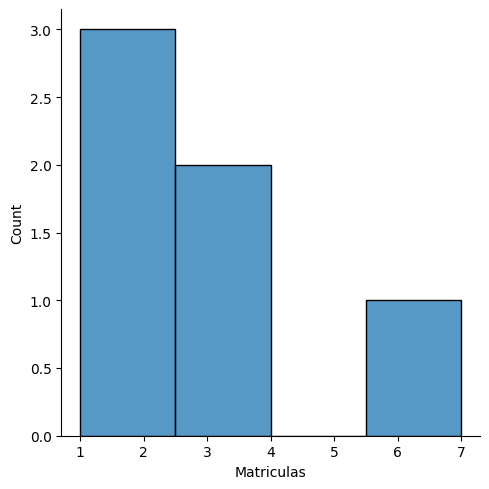

In [ ]:
# 6°) Vamos a usar la biblioteca SEABORN, para mostrar graficos, importamos-->
import seaborn as sns
sns.displot(nombres.Matriculas)
# genera 1 grafico a traves de la distriucion

In [ ]:
# 7°) Podemos ver la Distribucion en numeros -->
nombres.Matriculas.value_counts()
# 3 empleados con 1 curso, 2 empl con 3 cursos y 1 con 7 cursos

1    3
3    2
7    1
Name: Matriculas, dtype: int64

## SELECCIONANDO EMPLEADOS(nombres)

Relaccionamos EMPLEADOS(nombres) DATAFRAME con CURSOS DATAFRAME


In [ ]:
# 1°) Sabemos cuantos cursos estan matriculados cada alumno, pero NO! sabemos cuales con esos cursos-->
#Tenemos el NOMBRE, el ID, y en cuantos cursos estan MATRICULADOS, pero NO tenemos el ID de esos cursos
# NO tenemos esa relacion
nombres.head()

,Nombres_Empleados,ID_Empleado,Dominio,Email,Matriculas
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com,1
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com,7
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com,3
3,Teirtza,1,@dominiodeemail.com,teirtza@dominiodeemail.com,3
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com,1


In [ ]:
# Tenemos el NOMBRE del curso y el ID--->
# NECESITAMOS CREAR LA RELACION DE ID DE EMPLEADO E ID DE CURSO!!!
cursos.head()


,Nombre_Curso
Id,
1,Python
2,C
3,C++
4,Java
5,C#


In [ ]:
# 2°B) Queremos que los cursos sean PROBABILIDADES, es decir que un curso sea mas probable que otro, que un curso
#sea mas propenso que otro , creamos PROBABILIDADES
#Creamos 1 LISTA VACIA donde voy a guardar resultados de ID EMPLEADOS e INDICE DEL CURSO--->
todas_matriculas = []
x = np.random.rand(len(cursos)) # elige Aleatoriam. tamaño del curso!
prob = x / sum(x) # Variable de PROBABILIDADES
prob


array([0.01526159, 0.00763529, 0.0881397 , 0.07432375, 0.06868043,
       0.0506893 , 0.04598497, 0.05630211, 0.02996702, 0.0492576 ,
       0.06767605, 0.09079747, 0.01078923, 0.04907763, 0.02306201,
       0.04327032, 0.07443907, 0.04763156, 0.07901366, 0.02800125])

In [ ]:
# 2°A) Vamos a recorer el DataFrame NOMBRES, cada unos de los registros y para cada uno de los registros vamos a
# identificar cuantas MATRICULAS y vamos a escoger ALEATORIAMENTE el numero de CURSOS que nos indique el nuemro
# de MATRICULAS, si el EMPLEADO esta MATRICULADO en 1 curso , vamos a escoger 1 curso o si esta en 5 escogemos 5
# Hacemos un barrido con el METODO FOR--->

for index, row in nombres.iterrows():
  #INDEX, ROW = identificamos INDICE Y FILA del DATAFRAME, ITERROWS= para recorer FILA x FILA donde estan nuestros empleados
  id = row.ID_Empleado
  #id= grabamos en una VARIABLE e identificamos el ID del empleado, ROW.ID_Empleado= q selecciona la columna ID de empleado
  matriculas = row.Matriculas
  #matriculas= grabamos en una VARIABLE e identificamos de matriculas de cada empleado
  for i in range(matriculas):
  #FOR=realizamos otro FOR ANIDADO para la seleccion Aleatoriomente la cantidad de matriculas, RANGE(matriculas)= cant de cursos que nos indique la Variable Matriculas
    mat = [id, np.random.choice(cursos.index, p = prob)]
  #MAT= Creamos VARIABLE, con INDECE del empleado, NP.RANDOM=funcion para generar aleatoriamente el curso, .CHOICE=metodo para escoger
  #CURSOS.INDEX= elige Aleatoream. el curso con el INDICE el nombre del curso, tantas veces como cursos este Matriculado el Empleado

 #### PROB = ANTES DE HACER EL FOR TENEMOS QUE HACER 1 LISTA PARA VER QUE CURSO ES MAS PROBABLE QUE OTRA --->
# todas_matriculas = []
# x = np.random(len(cursos)) # elige Aleatoriam. tamaño del curso!
# prob = x / sum()####
  # Por ultimo en el FOR agregamos la VARIABLE MAT a la LISTA TODAS_MATRICULAS-->
    todas_matriculas.append(mat)


In [ ]:
# 3°) Luego del FOR creamos nuevo DATAFRAME a partir de la LISTA y creamos COLUMNAS -->
matriculas = pd.DataFrame(todas_matriculas, columns = ["ID_Empleado", "ID_Curso"])
matriculas.head() # Conectamos ambos DATAFRAME

,ID_Empleado,ID_Curso
0,2,9
1,4,1
2,4,7
3,4,14
4,4,18


In [ ]:
# 4°) Generamos reporte, donde mostramos cuantos EMPLEADOS estan MATRICULADOS en el curso con el nombre
# Primero hacemos un GROUPBY , en DATAFRAME de PANDAS tiene la opcion -->
matriculas.groupby("ID_Curso").count().join(cursos["Nombre_Curso"])
# GROUPBY= agrupamos por ID de curso, COUNT= cuantos alumnos estan matriculados en el curso, JOIN= cruzamos
# el DATAFRAME que contiene el nombre del curso

,ID_Empleado,Nombre_Curso
ID_Curso,,
1,1,Python
4,2,Java
6,3,JavaScript
7,2,Visual Basic
9,1,Assembly language
10,1,SQL
11,2,Fortran
14,1,Scratch
17,1,Rust


In [ ]:
# 5°) Mejoramos los datos, el orden y demas  -->
matriculas.groupby("ID_Curso").count().join(cursos["Nombre_Curso"])[["Nombre_Curso", "ID_Empleado"]].rename(columns={"ID_Empleado" : "Total"}).sort_values("Total", ascending= False)
                                                                    # Orden                       #Renombramos columna por TOTAL cantidas de empleado en el curso,SORT=ascendente orden

,Nombre_Curso,Total
ID_Curso,,
6,JavaScript,3
4,Java,2
7,Visual Basic,2
11,Fortran,2
18,R,2
1,Python,1
9,Assembly language,1
10,SQL,1
14,Scratch,1


In [ ]:
# 6°) Examinamos la VARIABLE PROBABILIDADES-->
prob # En la posicion (INDICE 7) la probabilidade de que sea mas elegido fue la mayor con 3, con 0.086 (8.6 % de que sea elegido)

array([0.01526159, 0.00763529, 0.0881397 , 0.07432375, 0.06868043,
       0.0506893 , 0.04598497, 0.05630211, 0.02996702, 0.0492576 ,
       0.06767605, 0.09079747, 0.01078923, 0.04907763, 0.02306201,
       0.04327032, 0.07443907, 0.04763156, 0.07901366, 0.02800125])

## SALIDA EN DIFERENTES FORMATOS


In [ ]:
# Exportamos nuestros datos en diferentes formatos de salida, exportamos los deatos de MATRICULAS
# Creamos VARIABLE para Matriculas-->
matriculas_por_curso = matriculas.groupby("ID_Curso").count().join(cursos["Nombre_Curso"])[["Nombre_Curso", "ID_Empleado"]].rename(columns={"ID_Empleado" : "Total"}).sort_values("Total", ascending= False)

In [ ]:
matriculas_por_curso

,Nombre_Curso,Total
ID_Curso,,
6,JavaScript,3
4,Java,2
7,Visual Basic,2
11,Fortran,2
18,R,2
1,Python,1
9,Assembly language,1
10,SQL,1
14,Scratch,1


In [ ]:
# Pandas ya incluye varios metodos de exportacion de DATAFRAME-->
# Lo que esportamos a otro archivo lo vemos en archivos de COLAB (izquierda)

# CSV ---->
matriculas_por_curso.to_csv("matriculas_por_curso.csv") #, index= False)
# TO_CSV= convierte el formato dataframe a csv  , INDEX= Si NO queremos la columna INDICE

In [ ]:
# JSON ---->
matriculas_por_curso.to_json("matriculas_por_curso.json")

In [ ]:
# HTML--->
matriculas_por_curso.to_html("matriculas_por_curso.html")#, index= False)
# Se descarga para verlo en la web

In [ ]:
# POR SI QUEREMOS CONCAT LOS TRES DATAFRAME
#dataframe_final = pd.concat([nombres, cursos, matriculas_por_curso], axis=1)
#dataframe_final.head(6)

## CREANDO EL BANCO SQL

Vamos a utilizar un DATAFRAME y lo vamos a grabar y guardar en un banco SQL, luego lo vamos a leer con unas QUERYS

In [ ]:
# 1°) Para crear banco SQL dentro de PANDAS, debemos importar una biblioteca que trabaja con sql
# pero NO vamos a importar toda la biblioteca sino algunas librerias --->
from sqlalchemy import create_engine, MetaData, Table, inspect, text

In [ ]:
matriculas_por_curso.head(3)

,Nombre_Curso,Total
ID_Curso,,
6,JavaScript,3
4,Java,2
7,Visual Basic,2


In [ ]:
type(matriculas_por_curso)

pandas.core.frame.DataFrame

In [ ]:
# Creamos el MOTOR(engine)-->
engine = create_engine("sqlite:///:memory:")
# create_engine=MotorSQL, "sqlite:///:memory:"=Sql de la nube de colab, No es necesario descargar ej.MYSQL local
engine# Motor creado en memoria

Engine(sqlite:///:memory:)

In [ ]:
# Creamos la TABLA -->
matriculas_por_curso.to_sql("matriculas", engine)
#engine

10

In [ ]:
insp = inspect(engine)
print(insp.get_table_names())

['matriculas']


## BUSCANDO EN EL BANCO

In [ ]:
# 1°) Buscamos los cursos con menos de 4 Empleados matriculados, usaremos QUERY, y aplicamos
# esa query dentro del motor sql -->
query = "select * from matriculas where Total < 3"

In [ ]:
# 2°) Invocamos a PANDAS y vamos a leer la instruccion SQL -->
pd.read_sql(sql = text(query), con = engine.connect()) # nos devuelve la tabla donde hay menos de 4 empleados matriculado
  #metodo

,ID_Curso,Nombre_Curso,Total
0,4,Java,2
1,7,Visual Basic,2
2,11,Fortran,2
3,18,R,2
4,1,Python,1
5,9,Assembly language,1
6,10,SQL,1
7,14,Scratch,1
8,17,Rust,1


In [ ]:
# 3°) Para extraer todo el contenido de la Tabla -->
muchas_matriculas = pd.read_sql_table("matriculas", con = engine.connect(), columns=["Nombre_Curso", "Total"])
muchas_matriculas
# read_sql_table= metodo para leer tabla completa, con=engine.connect()= donde se encuantra la tabla(motor), columns= muestra las colum que quiero ver

,Nombre_Curso,Total
0,JavaScript,3
1,Java,2
2,Visual Basic,2
3,Fortran,2
4,R,2
5,Python,1
6,Assembly language,1
7,SQL,1
8,Scratch,1
9,Rust,1


In [ ]:
# 4°) Otro tipo de Metodo para buscar datos si ya tengo mi DATAFRAME contruido, utilizamos el metodo de
# dataframe .QUERY() -->
muchas_matriculas = muchas_matriculas.query("Total < 3")
muchas_matriculas

,Nombre_Curso,Total
1,Java,2
2,Visual Basic,2
3,Fortran,2
4,R,2
5,Python,1
6,Assembly language,1
7,SQL,1
8,Scratch,1
9,Rust,1


## ESCRIBIENDO EN EL BANCO SQL


In [ ]:
# 5°) Vamos a grabar es el motor ENGINE una nueva tabla -->
muchas_matriculas.to_sql("muchas_matriculas", engine)

9

In [ ]:
# 6°) Mostramos todas la tablas que existen en mi motor engine -->
insp = inspect(engine)
print(insp.get_table_names())

['matriculas', 'muchas_matriculas']


## ALUMNOS EN PROXIMA CLASE

Creamos registro de los datos de todos los DATAFRAME creados para dejar listo reporte para quien lo solicite

NOMBRES PARA EL INGRESO



In [ ]:
# 1°) Vamos a realizar algunos JOIN --->
matriculas.sample(5) # Tenemos la relacion entre empleado con el id y la relacion del curso con el id

,ID_Empleado,ID_Curso
9,5,6
12,1,7
2,4,7
8,5,17
15,6,11


In [ ]:
# 2°) Filtramos EMPLADOS por el CURSO, generamos variable -->
id_curso = 6 # 6 id del curso
proxima_clase = matriculas.query("ID_Curso == {}".format(id_curso))
proxima_clase

,ID_Empleado,ID_Curso
5,4,6
7,4,6
9,5,6


In [ ]:
# 3°) Generamos nombres de EMPLEADOS con los CURSOS respectivos, primero los nombres de EMPLEADOS -->
# PARA ESTO HACEMOS UN JOIN!!! PARA EXTRAER LOS NOMBRES
nombres.sample(5)

,Nombres_Empleados,ID_Empleado,Dominio,Email,Matriculas
4,Jhon,3,@serviciodeemail.com,jhon@serviciodeemail.com,1
2,Neale,5,@serviciodeemail.com,neale@serviciodeemail.com,3
5,Lisa,6,@serviciodeemail.com,lisa@serviciodeemail.com,1
1,Vaughn,4,@dominiodeemail.com,vaughn@dominiodeemail.com,7
0,Josy,2,@serviciodeemail.com,josy@serviciodeemail.com,1


In [ ]:
proxima_clase.set_index("ID_Empleado").join(nombres.set_index("ID_Empleado"))
#Tomamos proxima clase que es donde esta el id de curso
# Nos devuelve el nombre con el ID del curso y todas las demas columnas, pero solo necesitamos la de NOMBRE

,ID_Curso,Nombres_Empleados,Dominio,Email,Matriculas
ID_Empleado,,,,,
4,6,Vaughn,@dominiodeemail.com,vaughn@dominiodeemail.com,7
4,6,Vaughn,@dominiodeemail.com,vaughn@dominiodeemail.com,7
5,6,Neale,@serviciodeemail.com,neale@serviciodeemail.com,3


In [ ]:
# 4°) Hacemos de nuevo el join y especificamos extrear la columna NOMBRE -->
proxima_clase.set_index("ID_Empleado").join(nombres.set_index("ID_Empleado"))["Nombres_Empleados"]

ID_Empleado
4    Vaughn
4    Vaughn
5     Neale
Name: Nombres_Empleados, dtype: object

In [ ]:
# 5°) Nos devuelve el nombre con su id, pero en formato objeto, lo pasamos a DATAFRAME -->
proxima_clase.set_index("ID_Empleado").join(nombres.set_index("ID_Empleado"))["Nombres_Empleados"].to_frame()

,Nombres_Empleados
ID_Empleado,
4,Vaughn
4,Vaughn
5,Neale


In [ ]:
# 6°) Como no nos muestra los NOMBRES del CURSO, lo adicionamos, buscando los que tiene el curso de id numero 6
# Creamos Variable -->
cursos.sample(5)

,Nombre_Curso
Id,
12,Go
3,C++
9,Assembly language
6,JavaScript
11,Fortran


In [ ]:
nombre_aula = cursos.loc[id_curso] # id_curso=6
nombre_aula

Nombre_Curso    JavaScript
Name: 6, dtype: object

In [ ]:
# 7°) Solo queremos el nombre del curso --->
nombre_aula = nombre_aula.Nombre_Curso
nombre_aula

'JavaScript'

In [ ]:
# 8°) Adicionamos el nombre del curso al DATAFRAME PROXIMA CLASE-->
#### ACTUALIZAMOS DATOS #####
proxima_clase = proxima_clase.set_index("ID_Empleado").join(nombres.set_index("ID_Empleado"))["Nombres_Empleados"].to_frame()

In [ ]:
# 9°) Sobreescribimos PROXIMA CLASE y agregamos columna y la reenombramos-->
proxima_clase = proxima_clase.rename(columns={"Nombres_Empleados" : " Alumnos del curso de {}".format(nombre_aula)}) # nombre_aula= donde se encuentra el nombre
proxima_clase

## DE ESTE MANERA YA PODEMOS INFORMAR EN QUE AULA TIENE CADA EMPLEADO CON SU NOMBRE LA CLASE DE DETERMINADO CURSO ##

,Alumnos del curso de JavaScript
ID_Empleado,
4,Vaughn
4,Vaughn
5,Neale


## ESCRBIENDO Y LEYENDO EXCEL

Transformamos el DATAFRAME a EXCEL para que sea mas facil de imprimir y leer


In [ ]:
proxima_clase.to_excel("proxima_clase.xlsx", index= False)# index = false, crea excel sin indices

In [ ]:
# A partir del excel podemos leer los datos en colab -->
pd.read_excel("proxima_clase.xlsx")

,Alumnos del curso de JavaScript
0,Vaughn
1,Vaughn
2,Neale
